# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Data Loading

In [ ]:
# Loading the dataset
spambase = pd.read_csv("spambase.csv")

# Adding column names
spambase.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'class']

In [ ]:
# Displaying the top 5 rows of the dataset
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
# Displaying the shape of the dataset
spambase.shape

(4600, 58)

Data Preprocessing

### Data Cleaning

In [ ]:
# Remove duplicate rows in the dataset
spambase = spambase.drop_duplicates()

In [ ]:
# Shape of the dataset after dropping the duplicate rows
spambase.shape

(4209, 58)

### Data Visualization

Summary of dataset

In [ ]:
spambase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


In [ ]:
spambase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4209 non-null   float64
 1   word_freq_address           4209 non-null   float64
 2   word_freq_all               4209 non-null   float64
 3   word_freq_3d                4209 non-null   float64
 4   word_freq_our               4209 non-null   float64
 5   word_freq_over              4209 non-null   float64
 6   word_freq_remove            4209 non-null   float64
 7   word_freq_internet          4209 non-null   float64
 8   word_freq_order             4209 non-null   float64
 9   word_freq_mail              4209 non-null   float64
 10  word_freq_receive           4209 non-null   float64
 11  word_freq_will              4209 non-null   float64
 12  word_freq_people            4209 non-null   float64
 13  word_freq_report            4209 

Visualize the distribution of spam and non-spam emails

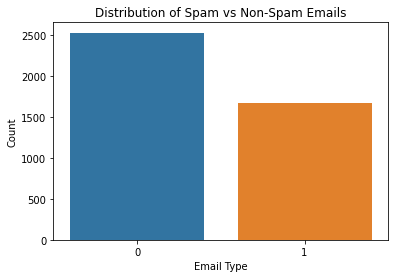

In [ ]:
sns.countplot(x='class', data=spambase)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

Visualize the correlation between the features

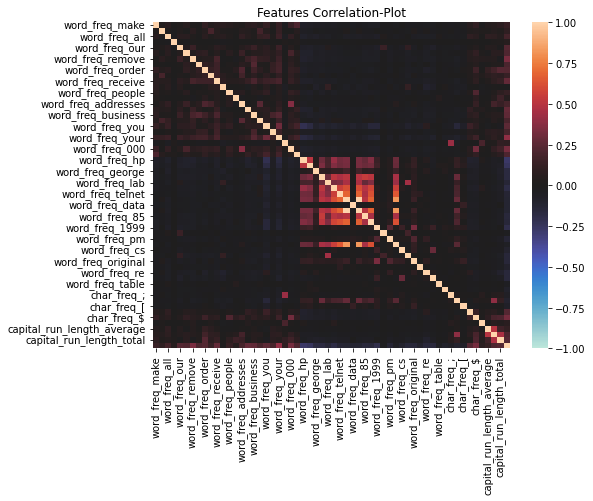

In [ ]:
# Compute the correlation matrix
corr = spambase.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=[8,6])
plt.title('Features Correlation-Plot')
sns.heatmap(corr, vmin=-1, vmax=1, center=0) 
plt.show()

### Extract the features and target variable

In [ ]:
# Create a dataframe with all data except the target column
X = spambase.drop(columns=['class'])

# Separate target values
Y = spambase['class'].values

### Standardizing the dataset

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Transform the features
X_scaled = scaler.fit_transform(X)

# Performing KNN on scaled data

Splitting the scaled dataset into train and test data

In [ ]:
# Split the scaled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=0)

Determining the best K value

Best K value: 5
Best accuracy: 88.29%


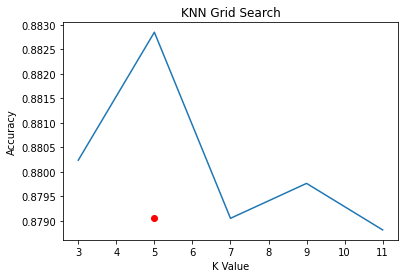

In [ ]:
# Define the parameter grid for k
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_scaled, Y)

# Print the best k value and corresponding accuracy
print("Best K value: {}".format(grid_search.best_params_['n_neighbors']))
print("Best accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Extract the test set accuracy for each k value
scores = grid_search.cv_results_['mean_test_score']
best_k = grid_search.best_params_['n_neighbors']

# Plot the test set accuracy vs. k values
plt.plot(param_grid['n_neighbors'], scores)
plt.scatter(best_k, scores[best_k//2], color='red')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Grid Search')
plt.show()

Training the model

In [ ]:
# Train a KNN classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Checking accuracy of train data

In [ ]:
# Predict the labels of the train set
Y_train_pred = knn.predict(X_train)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_train, Y_train_pred)
print("Train data accuracy: {:.2f}%".format(accuracy * 100))

Train data accuracy: 92.62%


Checking accuracy of test data

In [ ]:
# Predict the labels of the test set
Y_test_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_test_pred)
print("Test data accuracy: {:.2f}%".format(accuracy * 100))

Test data accuracy: 89.93%


### Confusion Matrix

Training data

In [ ]:
# Print the Confusion Matrix
cm = confusion_matrix(Y_train, Y_train_pred)

print('Confusion Matrix of Training Data')
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix of Training Data

True Positives(TP) =  1820

True Negatives(TN) =  1103

False Positives(FP) =  95

False Negatives(FN) =  138


In [ ]:
# Print the Confusion Matrix Report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1915
           1       0.92      0.89      0.90      1241

    accuracy                           0.93      3156
   macro avg       0.93      0.92      0.92      3156
weighted avg       0.93      0.93      0.93      3156



Testing data

In [ ]:
# Print the Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred)

print('Confusion Matrix of Testing Data')
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix of Testing Data

True Positives(TP) =  579

True Negatives(TN) =  368

False Positives(FP) =  37

False Negatives(FN) =  69


In [ ]:
# Print the Confusion Matrix Report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       616
           1       0.91      0.84      0.87       437

    accuracy                           0.90      1053
   macro avg       0.90      0.89      0.90      1053
weighted avg       0.90      0.90      0.90      1053



### ROC curve and AUC

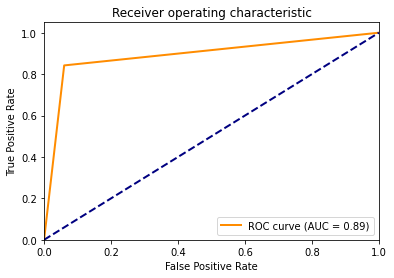

AUC: 0.89


In [ ]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print("AUC: %0.2f" % roc_auc)

# Performing PCA on scaled data

Determining optimal number of components

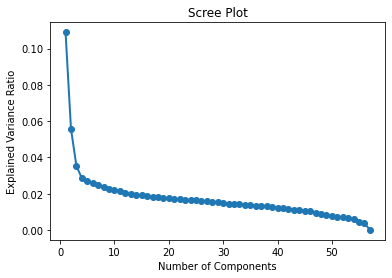

Optimal number of components: 49


In [ ]:
# Creating a PCA object and fit the scaled data
pca = PCA()
pca.fit(X_scaled)

# generate scree plot
plt.plot(np.arange(1, pca.n_components_+1), pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# determine optimal number of components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print('Optimal number of components:', n_components)

In [ ]:
pca = PCA(n_components=49)
pca.fit(X_scaled)

# Transform the data
X_pca = pca.transform(X_scaled)

Get reconstruction loss

In [ ]:
# Reconstruct the data using the retained principal components
X_reconstructed = pca.inverse_transform(X_pca)

# Compute the reconstruction loss
reconstruction_loss = np.mean(np.square(X_scaled - X_reconstructed))
print('Reconstruction loss:', reconstruction_loss)

Reconstruction loss: 0.043327609481529784


# Performing KNN on PCA performed data

Splitting the pca perfomed data into train and test data

In [ ]:
# Split the scaled data into training and testing sets
X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_pca, Y, test_size=0.25, random_state=0)

Training the model

In [ ]:
# Train a KNN classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca_train, Y_pca_train)

KNeighborsClassifier()

Checking accuracy of train data

In [ ]:
# Predict the labels of the test set
Y_pca_train_pred = knn.predict(X_pca_train)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_pca_train, Y_pca_train_pred)
print("Train data accuracy: {:.2f}%".format(accuracy * 100))

Train data accuracy: 92.62%


Checking accuracy of test data

In [ ]:
# Predict the labels of the test set
Y_pca_test_pred = knn.predict(X_pca_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_pca_test, Y_pca_test_pred)
print("Test data accuracy: {:.2f}%".format(accuracy * 100))

Test data accuracy: 90.69%


### Confusion Matrix

Training data

In [ ]:
# Print the Confusion Matrix
cm = confusion_matrix(Y_pca_train, Y_pca_train_pred)

print('Confusion Matrix of Training Data')
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix of Training Data

True Positives(TP) =  1818

True Negatives(TN) =  1105

False Positives(FP) =  97

False Negatives(FN) =  136


In [ ]:
# Print the Confusion Matrix Report
print(classification_report(Y_pca_train, Y_pca_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1915
           1       0.92      0.89      0.90      1241

    accuracy                           0.93      3156
   macro avg       0.92      0.92      0.92      3156
weighted avg       0.93      0.93      0.93      3156



Testing Data

In [ ]:
# Print the Confusion Matrix
cm = confusion_matrix(Y_pca_test, Y_pca_test_pred)

print('Confusion Matrix of Testing Data')
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix of Testing Data

True Positives(TP) =  577

True Negatives(TN) =  378

False Positives(FP) =  39

False Negatives(FN) =  59


In [ ]:
# Print the Confusion Matrix Report
print(classification_report(Y_pca_test, Y_pca_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       616
           1       0.91      0.86      0.89       437

    accuracy                           0.91      1053
   macro avg       0.91      0.90      0.90      1053
weighted avg       0.91      0.91      0.91      1053



### ROC curve and AUC

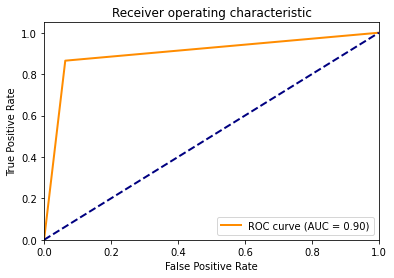

AUC: 0.90


In [ ]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_pca_test, Y_pca_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print("AUC: %0.2f" % roc_auc)